In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [7]:
# Set the path to the main project folder
path = r'C:\Users\luis\Desktop\Carrer Foundry boot camp\Machine Learning Specialization'

In [8]:
# Import the orders data
climate = pd.read_csv(os.path.join(path, 'Data Sets', 'Weather_scaled.csv'))
climate

,DATE,MONTH,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,TOURS_temp_min,TOURS_temp_max,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.902918,-0.528623,-0.845652,...,0.085361,-0.495396,0.761754,-1.299744,-0.806427,-0.088407,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.810126,-0.582946,-0.462450,...,-0.056680,-0.521727,1.183580,-1.262455,-1.042055,0.503361,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-1.065304,-0.257010,-0.186545,...,0.298424,-0.574390,1.183580,-0.432779,-1.136306,-0.396127,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.114186,-0.555784,-0.385810,...,0.458220,-0.442733,0.480538,0.387574,-1.183432,0.669056,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,0.187388,-1.003946,-1.075573,...,0.600262,-0.521727,-0.363113,1.729970,-0.794645,-0.490810,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,-0.02793,0.284075,1.037367,-0.005632,-0.004619,0.720943,0.747959,0.779123,...,1.221694,1.281970,-0.081896,-0.003958,-0.005290,-0.005560,-0.018319,-0.007287,-0.000520,-0.004530
22946,20221028,10,-0.02793,0.103401,0.976231,-0.005632,-0.004619,0.187388,0.856604,1.223637,...,1.630063,1.084485,-0.081896,-0.003958,-0.005290,-0.005560,-0.018319,-0.007287,-0.000520,-0.004530
22947,20221029,10,-0.02793,0.013064,0.716402,-0.005632,-0.004619,0.349774,0.856604,1.039701,...,1.665574,1.123982,-0.081896,-0.003958,-0.005290,-0.005560,-0.018319,-0.007287,-0.000520,-0.004530
22948,20221030,10,-0.02793,0.374412,0.487141,-0.005632,-0.004619,0.280180,0.680055,0.809780,...,0.902100,0.452533,-0.081896,-0.003958,-0.005290,-0.005560,-0.018319,-0.007287,-0.000520,-0.004530


In [13]:
# Display the list of columns
climate_columns_list = climate.columns.tolist()
print(climate_columns_list)

['DATE', 'MONTH', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation', 'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min', 'DUSSELDORF_temp_max', 'GDANSK_humidity', 'GDANSK_pre

In [9]:
# Import the  data answer
ans = pd.read_csv(os.path.join(path, 'Supervised', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
ans

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# Display the list of columns
ans_columns_list = ans.columns.tolist()
print(columns_list)

['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather', 'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather', 'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather', 'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather']


In [12]:
# Drop the 'DATE' column from the dataframe
ans = ans.drop(columns=['DATE'])

# Display the dataframe to check if the column is dropped
ans

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
#Reduce to just the mean temperatures
df = climate[['BASEL_temp_mean', 
              'BELGRADE_temp_mean', 
              'BUDAPEST_temp_mean', 
              'DEBILT_temp_mean', 
              'DUSSELDORF_temp_mean', 
              'HEATHROW_temp_mean', 
              'KASSEL_temp_mean', 
              'LJUBLJANA_temp_mean', 
              'MAASTRICHT_temp_mean', 
              'MADRID_temp_mean', 
              'MUNCHENB_temp_mean', 
              'OSLO_temp_mean', 
              'SONNBLICK_temp_mean', 
              'STOCKHOLM_temp_mean', 
              'VALENTIA_temp_mean']].copy()

In [15]:
df

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-0.124331,-0.391072,-0.668215
1,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.650834,-0.415953,-0.548046
2,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.650834,-0.615003,-0.067372
3,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.943336,-0.764290,-0.998679
4,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.621584,-0.503037,-1.509396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0.747959,0.628750,-0.005167,0.898267,1.042841,0.906865,-0.005705,0.481853,1.268193,0.683127,0.664244,0.395898,0.826301,0.517090,-0.007287
22946,0.856604,0.367720,-0.005167,0.945734,1.278467,0.802037,-0.005705,0.263891,1.313202,0.561815,0.890456,0.541516,1.074927,0.641496,-0.007287
22947,0.856604,0.083991,-0.005167,0.914089,1.101748,0.924336,-0.005705,0.300218,1.208181,0.548336,1.053832,0.395898,1.221178,0.716139,-0.007287
22948,0.680055,0.265577,-0.005167,0.692578,0.880848,0.697210,-0.005705,0.397090,0.923123,0.103526,0.689378,-0.065226,1.235803,0.019467,-0.007287


In [18]:
X = df
y = ans

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: K-Nearest Neighbors Model with Multilabel Classification

In [22]:
from sklearn.multioutput import MultiOutputClassifier

# Range of k-values (reduce from 60 to a smaller range)
k_range = np.arange(1, 10)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))

# Iterate over k values
for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)  # Use MultiOutputClassifier for multilabel classification
    classifier.fit(X_train, y_train)  # Fit the model
    
    # Predictions
    y_pred = classifier.predict(X_test)
    
    # Accuracy
    train_acc[i] = classifier.score(X_train, np.array(y_train))
    test_acc[i] = classifier.score(X_test, np.array(y_test))
    
    print(f"K: {k}, Training Accuracy: {train_acc[i]}, Testing Accuracy: {test_acc[i]}")


K: 1, Training Accuracy: 1.0, Testing Accuracy: 0.41830065359477125
K: 2, Training Accuracy: 0.5360021786492375, Testing Accuracy: 0.4318082788671024
K: 3, Training Accuracy: 0.5269063180827886, Testing Accuracy: 0.43311546840958604
K: 4, Training Accuracy: 0.4857843137254902, Testing Accuracy: 0.440958605664488
K: 5, Training Accuracy: 0.48736383442265796, Testing Accuracy: 0.44074074074074077
K: 6, Training Accuracy: 0.4726579520697168, Testing Accuracy: 0.44575163398692813
K: 7, Training Accuracy: 0.47320261437908495, Testing Accuracy: 0.4496732026143791
K: 8, Training Accuracy: 0.46721132897603485, Testing Accuracy: 0.4468409586056645
K: 9, Training Accuracy: 0.46677559912854033, Testing Accuracy: 0.452723311546841


## Key Observations:

### Training Accuracy Decreases Gradually:
As K increases from 1 to 9, the training accuracy gradually decreases from 1.0 (overfitting) at K=1 to 0.4668 at K=9. This is expected behavior for the KNN algorithm since larger values of K result in a smoother decision boundary that generalizes better to new data.

### Testing Accuracy Improvement:
Testing accuracy improves from 0.4183 at K=1 to a maximum of 0.4527 at K=9. While the increase is incremental, this suggests that the model is improving at generalizing to unseen data as K increases.

### Best K Value:
K=9 has the highest testing accuracy at 0.4527, which is still low but an improvement compared to lower values of K. The model seems to reach an optimal point for testing accuracy between K=7 and K=9.

### Small Gains for Larger K:
Moving from K=7 to K=9, testing accuracy continues to rise, though the gains are relatively small. This suggests that a further increase in K might continue to marginally improve testing accuracy, though this improvement may plateau soon.


# Step 3: Plotting the Confusion Matrices

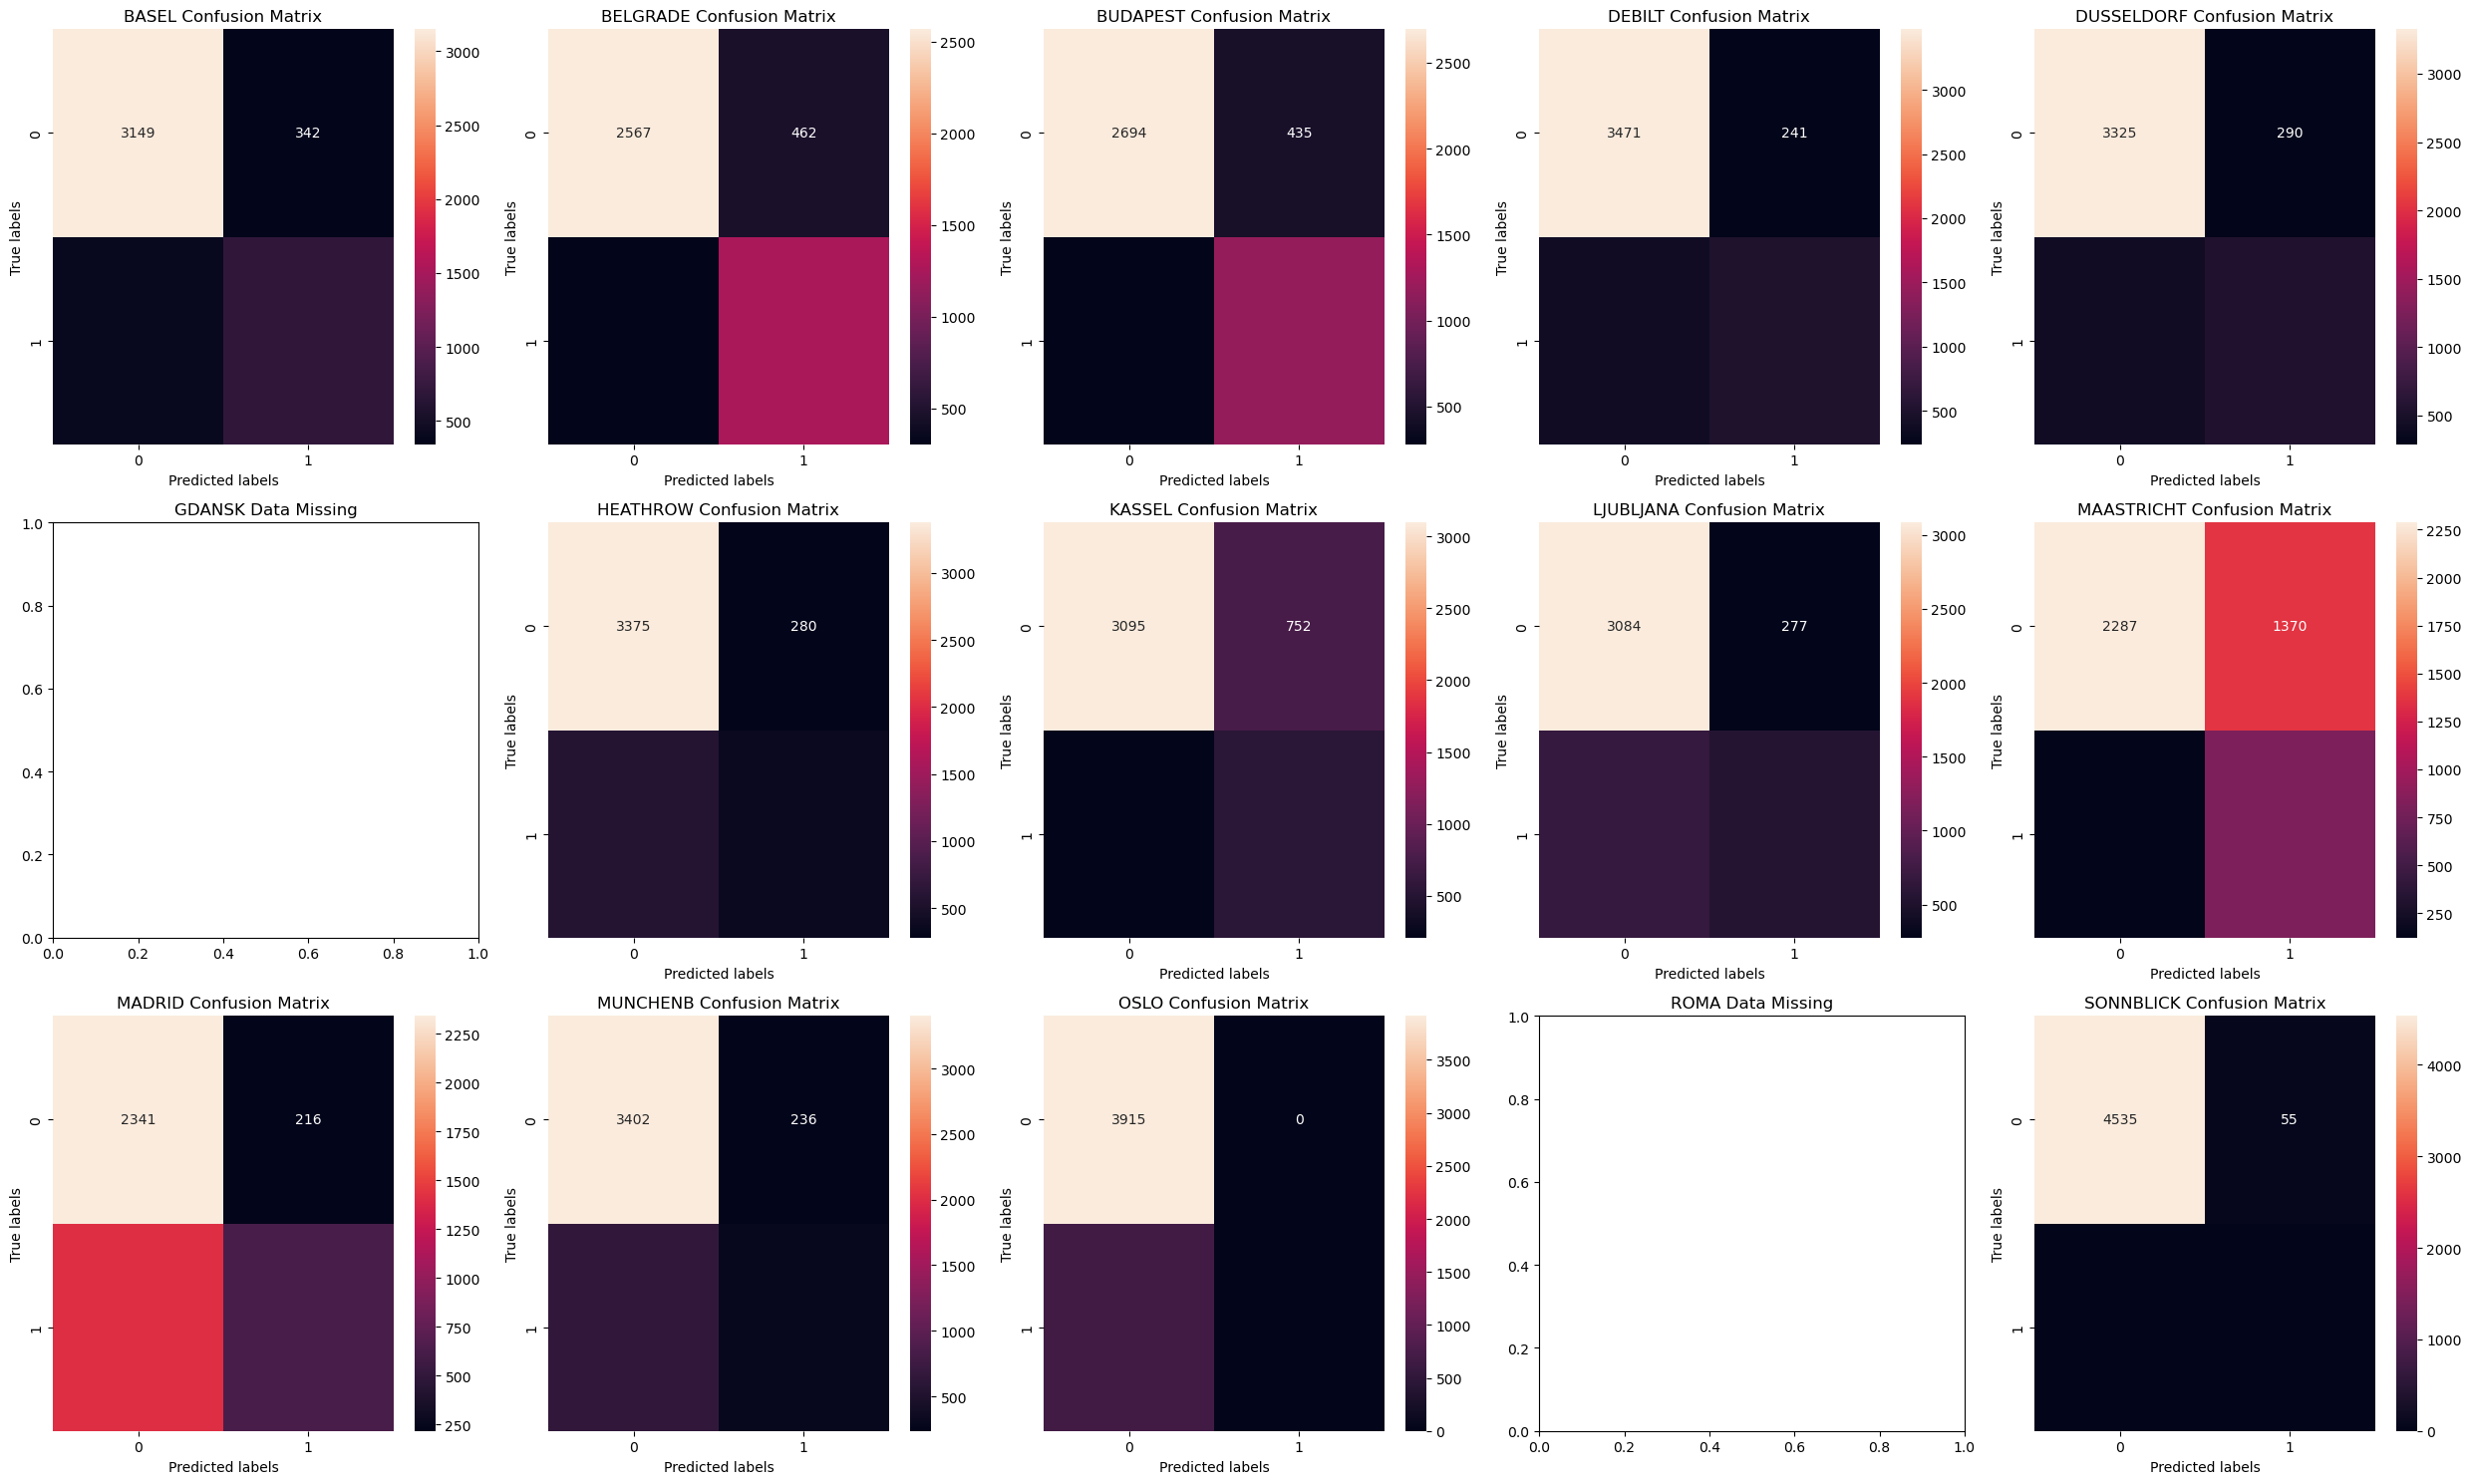

In [24]:
# Generate confusion matrices for each station
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']
count = 0

for i in range(3):
    for j in range(5):
        if count < len(locations):
            name = locations[count]
            # Check if the station exists in y_test
            if name + key in y_test.columns:
                cm = confusion_matrix(y_test[name + key], y_pred[:, count])
                sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
                ax[i, j].set_xlabel('Predicted labels')
                ax[i, j].set_ylabel('True labels')
                ax[i, j].set_title(f"{name} Confusion Matrix")
            else:
                ax[i, j].set_title(f"{name} Data Missing")
            count += 1
plt.tight_layout()
plt.show()


## Observation:

### High Accuracy in Some Stations:
Some stations like BASEL, DEBILT, and OSLO have a clear diagonal dominance, indicating a relatively higher accuracy. For instance, OSLO shows no misclassification of unpleasant weather (True labels = 1), while Basel and Debilt have very few misclassified instances.

### Misclassification in Other Stations:
MAASTRICHT shows significant misclassification. The lower-right quadrant (where the true label is unpleasant, and it was predicted as pleasant) has a relatively high value compared to the correct classifications, indicating that the model struggles with this station.

### Missing Data for Certain Stations:
As expected, GDANSK and ROMA are missing, and the script correctly accounted for these stations. This confirms that these locations lacked sufficient data for supervised learning.
